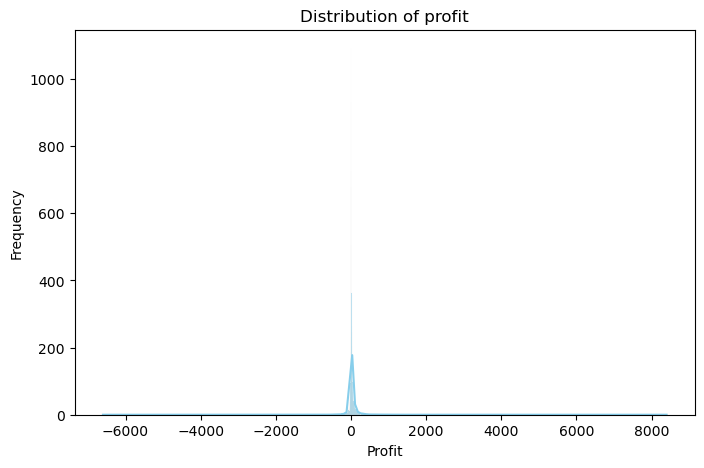

C:\Users\HP\AppData\Local\Temp\ipykernel_8852\1165433126.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region',y='Sales',data=df,palette='pink')


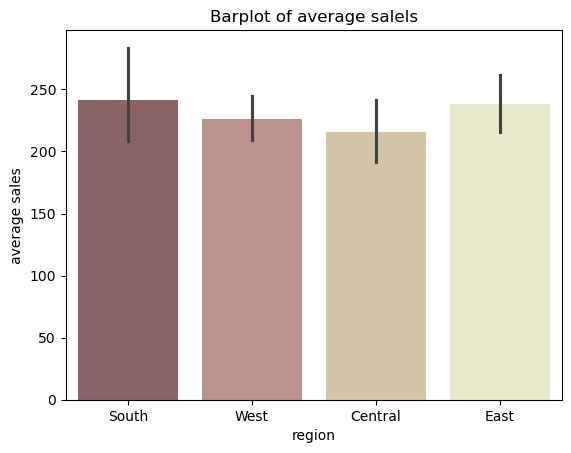

C:\Users\HP\AppData\Local\Temp\ipykernel_8852\1165433126.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Category',y='Profit',palette='pastel')


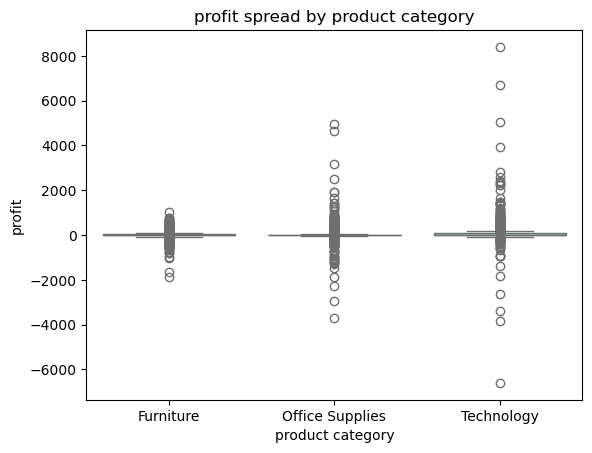

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Sample - Superstore.csv")
df.head()

'''a:- distribution of profit'''
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'],kde=True,color='skyblue')
plt.title("Distribution of profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


'''b:-barplot of avearge sales grouped by region'''
plt.title("Barplot of average salels")
plt.ylabel("average sales")
plt.xlabel("region")
sns.barplot(x='Region',y='Sales',data=df,palette='pink')
plt.show()


'''c:- boxplot showing spread of profit for each product category'''
plt.title("profit spread by product category")
plt.xlabel('product category')
plt.ylabel('profit')
sns.boxplot(data=df,x='Category',y='Profit',palette='pastel')
plt.show()


#question2:Time series visualization

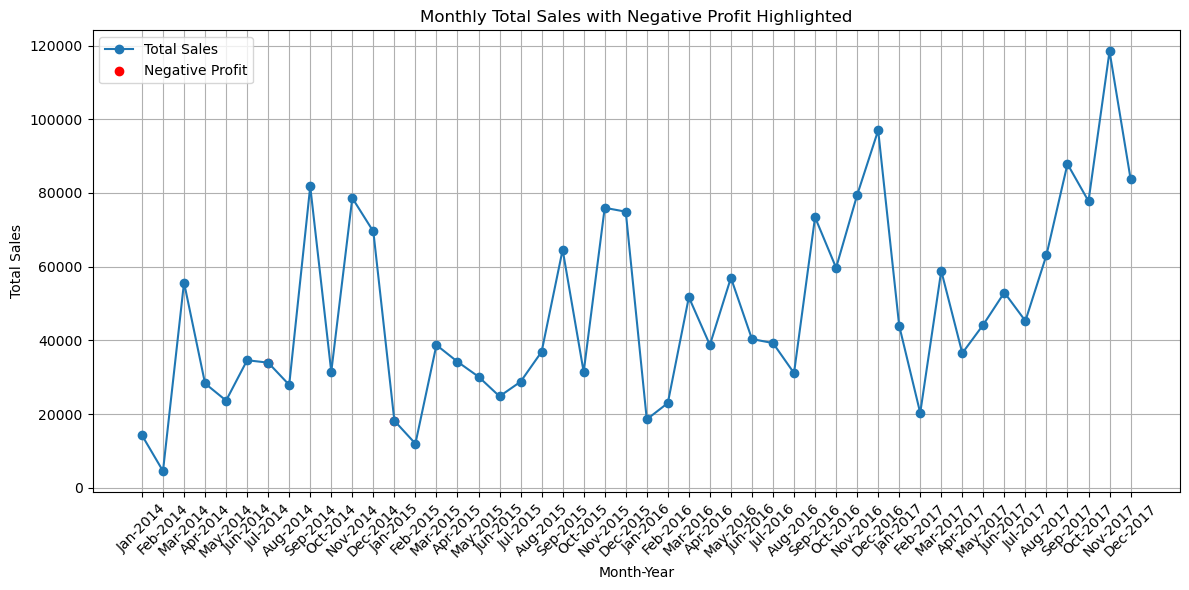

In [58]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Sample - Superstore.csv")

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month_Year'] = df['Order Date'].dt.to_period('M')
monthly_data = df.groupby('Month_Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

monthly_data['Month_Year_Str'] = monthly_data['Month_Year'].dt.strftime('%b-%Y')
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month_Year_Str'], monthly_data['Sales'], marker='o', label='Total Sales')

neg_profit = monthly_data['Profit'] < 0
plt.scatter(
    monthly_data.loc[neg_profit, 'Month_Year_Str'], 
    monthly_data.loc[neg_profit, 'Sales'], 
    color='red', 
    label='Negative Profit'
)
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales with Negative Profit Highlighted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#question3:corelation analysis

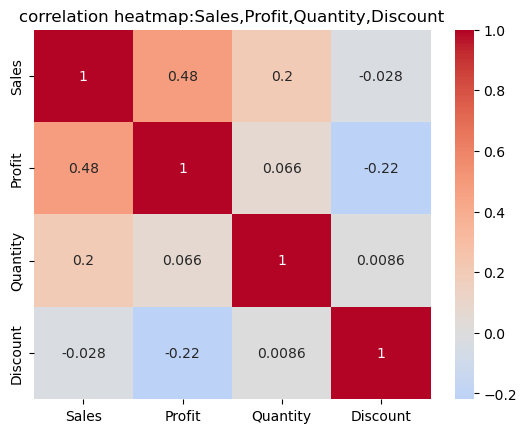

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv("Sample - Superstore.csv")
cols=['Sales','Profit','Quantity','Discount']
corr=df[cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',center=0)
plt.title("correlation heatmap:Sales,Profit,Quantity,Discount")
plt.show()

#question4:custom plot styling

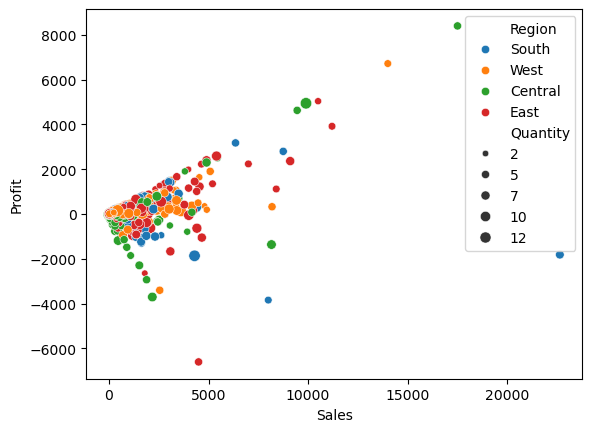

C:\Users\HP\AppData\Local\Temp\ipykernel_8852\680839312.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region and Quantity')


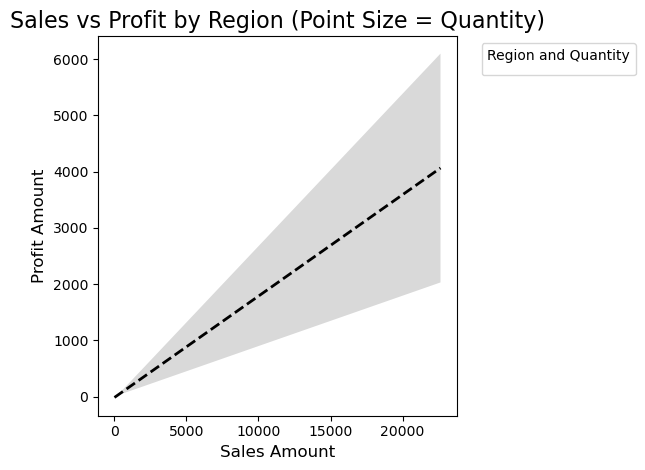

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("Sample - Superstore.csv")

sns.scatterplot(data=df,x='Sales',y='Profit',size='Quantity',hue='Region')
plt.show()


sns.regplot(
    data=df,
    x='Sales',
    y='Profit',
    scatter=False,
    color='black',   # Trendline color
    line_kws={'linewidth':2, 'linestyle':'--'}
)

# Customize chart
plt.title('Sales vs Profit by Region (Point Size = Quantity)', fontsize=16)
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('Profit Amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Region and Quantity')
plt.tight_layout()
plt.show()
